## The Titanic Project

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_dir = "Titanic Data"

In [3]:
train_df = pd.read_csv(os.path.join(data_dir, "train.csv"))
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv(os.path.join(data_dir, "test.csv"))
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Primary data analysis


In [5]:
print(f"train dataset shape: {train_df.shape}")
print(f"test dataset shape : {test_df.shape}")

train dataset shape: (891, 12)
test dataset shape : (418, 11)


<br>The gender sumbission file contains only two column features.<br>
A closer look at the columns, it contains the <strong>survival status of the passengers</strong> i.e survived or passed away.<br>
It is also a subset of the <strong>test dataset</strong>.<br>
<br>
This implies that we will use it to evaluate our model accuracy


In [6]:
# Check description of both train and testing datasets

print("Training dataset description information")
display(train_df.describe(include = ['O'])) #this will get information on the object columns
display(train_df.describe())
print("*"*100)
print("Testing dataset decribe information")
display(test_df.describe(include= ['O']))
display(test_df.describe())

Training dataset description information


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goodwin, Master. Sidney Leonard",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


****************************************************************************************************
Testing dataset decribe information


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Hagardon, Miss. Kate",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<h5>Quick Insights</h5>

We can already tell that there are <strong> missing values</strong> in both datasets <br>
However, lets see their count in a more explanatory way

In [7]:
# Number of null values for each column in train and test dataset 

print("Training data missing values")
display(train_df.isnull().sum())
print("*"*100)
print("Testing data missing values")
display(test_df.isnull().sum())

Training data missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

****************************************************************************************************
Testing data missing values


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### Missing Values insights
In the <strong>train data</strong> columns with missing values are:
<ul>
    <li> Age : 177 values</li>
    <li> Cabin : 678 Values</li>
    <li> Embarked : 2 Values</li>
   </ul>
In the <strong>test data</strong> columns with missing values are:
<ul>
    <li> Age : 86 values</li>
    <li> Cabin : 327 Values</li>
</ul>

In [8]:
# Checking for any duplicate rows


The <strong>Cabin column</strong> has a lot of missing values which means it can not be an influential feature in training the model.<br>
Therefore the best option is to drop it

In [9]:
# Dropping the Cabin Colunm

train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)

### Exploratory Data Analysis (EDA)
EDA is carrying out an indepth analysis of the data so as to discover hidden patterns, data anormalies, and test hypothesis/assumptions<br>
We will use statistical methods and visuals(graphical) 

We will first sort out the missing values

In [10]:
print('Train data: Missing age Values')
display(train_df.Age.isnull().value_counts())

print('-'*100)
print('Test data: Missing age Values')
display(test_df.Age.isnull().value_counts())


Train data: Missing age Values


False    714
True     177
Name: Age, dtype: int64

----------------------------------------------------------------------------------------------------
Test data: Missing age Values


False    332
True      86
Name: Age, dtype: int64

There are so many values of age that are missing.<br>
<ol>
<li> Train data: 177</li>
<li> Test Data: 86</li>
</ol>
Since age is a critical factor in the prediction, we cannot drop the column.<br>
As a result we need to take care of the missing values in either of the following ways:
<ul>
<li> Use mean age values</li>
<li> Try to allocate values randomly around the mean i.e choose random values between 25 and 75 percentile</li>
</ul>
<br>

In [11]:
print('Train data: Age description')
display(train_df.Age.describe())

print('-'*100)
print('Test data: Age description')
display(test_df.Age.describe())

Train data: Age description


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

----------------------------------------------------------------------------------------------------
Test data: Age description


count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

We neeed to <strong>drop</strong> some columns as we do not need them.
<ul>
    <li>For the <strong>categorical</strong> data we need to drop the following columns</li>
    <ol>
        <li>Name</li>
        <li>Ticket</li>
    </ol>
    <li>For the <strong>numerical</strong> data we need to drop the following columns</li>
    <ol>
        <li>PassengerId</li>
        <li>Survived</li>
    </ol>
</ul> 

In [12]:
#  Dropping hte columns
cat_df = train_df[["Sex", "Pclass", "Embarked", "Parch","SibSp"]]
num_df = train_df[["Age", "Fare", "Parch","SibSp"]]

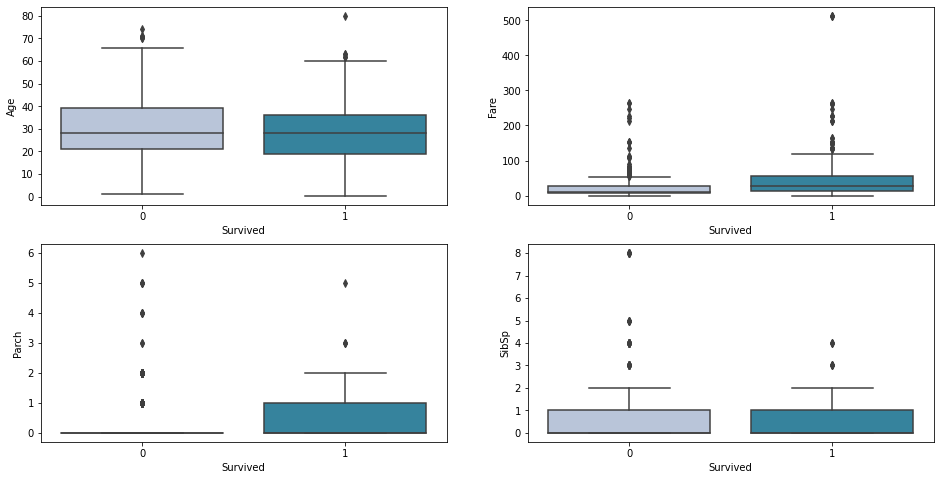

In [13]:
# plot numerical data

fig = plt.figure(figsize = (16,8))

for i in range(len(num_df.columns)):
    column = num_df.columns[i]
    sub = fig.add_subplot(2,2,i+1)
    chart = sns.boxplot(data = train_df, y = column, x = 'Survived', palette = 'PuBuGn')

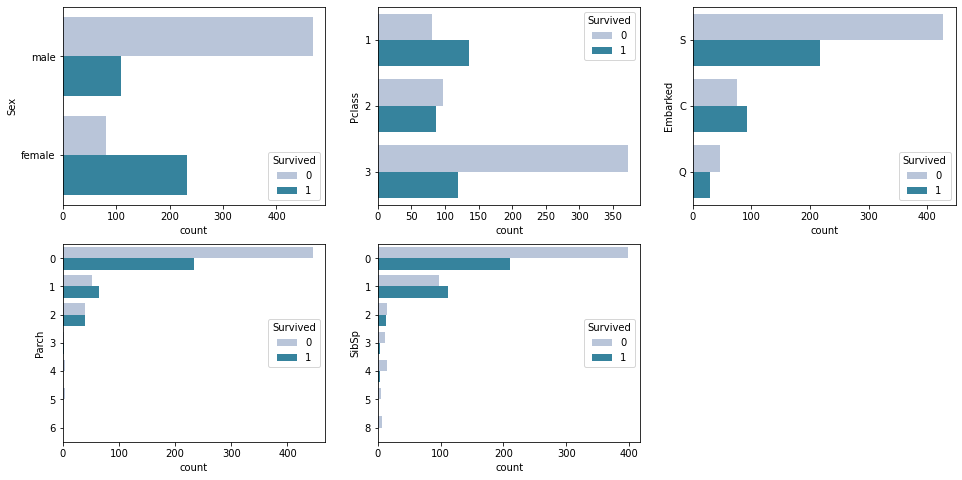

In [14]:
# plot categorical data

fig = plt.figure(figsize = (16,8))

for i in range(len(cat_df.columns)):
    column = cat_df.columns[i]
    sub = fig.add_subplot(2,3,i+1)
    chart = sns.countplot(data = train_df, hue = 'Survived', y = column, palette = 'PuBuGn')

In [15]:
# gender difference on board the titanic
males_on_board = train_df.loc[train_df.Sex == 'male']
percentage_males = (len(males_on_board)/train_df.shape[0])*100
print(f"Number of males on board = {len(males_on_board)} which is {round(percentage_males, 2)}%")

females_on_board = train_df.loc[train_df.Sex == 'female']
percentage_females = (len(females_on_board)/train_df.shape[0])*100
print(f"Number of females on board = {len(females_on_board)} which is {round(percentage_females, 2)}%\n\n")

# Get survival rate for both females and male
male_survival = males_on_board.loc[males_on_board.Survived == 1]
print(f"% of male survival: {len(male_survival)/males_on_board.shape[0]*100} %")

female_survival = females_on_board.loc[females_on_board.Survived == 1]
print(f"% of female survival: {len(female_survival)/females_on_board.shape[0]*100} %\n")


Number of males on board = 577 which is 64.76%
Number of females on board = 314 which is 35.24%


% of male survival: 18.890814558058924 %
% of female survival: 74.20382165605095 %



<AxesSubplot: title={'center': 'Survival distribution of diffrent ages'}, xlabel='Age', ylabel='Count'>

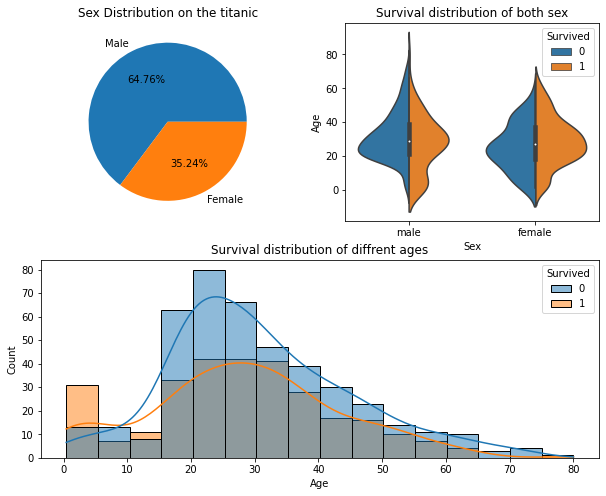

In [16]:
# plot sex distribution on board

fig = plt.figure(figsize = (10,8))

fig.add_subplot(221)
plt.title('Sex Distribution on the titanic')
plt.pie(data = train_df["Sex"], x = train_df.Sex.value_counts(), 
        labels = ['Male','Female'], autopct = '%.2f%%')


fig.add_subplot(222)
plt.title("Survival distribution of both sex")
sns.violinplot(data = train_df, x=train_df["Sex"],
           y = train_df['Age'], hue = train_df["Survived"],
              split=True)


fig.add_subplot(212)
plt.title("Survival distribution of diffrent ages")
sns.histplot(data = train_df, x=train_df["Age"],
           kde = True, hue = train_df["Survived"],
              bins = 16, stat = 'count')

#### Survival distribution of both males and females

<AxesSubplot: title={'center': 'Survival rates for females'}, xlabel='Age', ylabel='Count'>

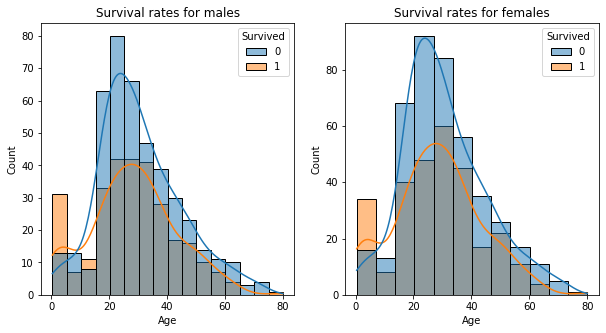

In [17]:
fig = plt.figure(figsize = (10,5))

# Survival rates for males
fig.add_subplot(121)
plt.title("Survival rates for males")
sns.histplot(data = train_df[train_df["Sex"] == "male"], 
            x = train_df["Age"], hue = train_df['Survived'], kde = True,
            bins = 16, stat = 'count')

# Survival rates for females
fig.add_subplot(122)
plt.title("Survival rates for females")
sns.histplot(data = train_df[train_df["Sex"] == "female"], 
            x = train_df["Age"], hue = train_df['Survived'],
            kde = True, bins = 12, stat = 'count')


## processing text data

In [18]:
display(train_df[['Name','Ticket']].head())

,Name,Ticket
0,"Braund, Mr. Owen Harris",A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450


We can tell that a passangers tittle is oncluded in the Name.<br>
we need to extract the titles<br>
Later, we will need to drop the ticket as we don't have any meanngfll information we can get from it

### Extract title from name

In [19]:
# We will extract titles from both train and testing
import re

train_df['Title'] = train_df['Name'].str.extract(r'([A-Za-z]+)\.')
test_df['Title'] = test_df['Name'].str.extract(r'([A-Za-z]+)\.')

print("Titles in train data/n")
display(train_df.Title.value_counts())
print('Titles in the test data')
display(test_df.Title.value_counts())
print('*'*100)

# Check missing title values
print('Missing Title values in train data')
display(train_df.Title.isnull().value_counts())

print('Missing Title values in test data')
display(test_df.Title.isnull().value_counts())


Titles in train data/n


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Lady          1
Sir           1
Jonkheer      1
Don           1
Ms            1
Capt          1
Mme           1
Name: Title, dtype: int64

Titles in the test data


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

****************************************************************************************************
Missing Title values in train data


False    891
Name: Title, dtype: int64

Missing Title values in test data


False    418
Name: Title, dtype: int64

All passangers had a title and as shown, no missing values in the titles<br><br>
We want to clean the titles so that we can have the fillowing categories:
<ul>
<li>Mr.</li>
<li>Mrs.</li>
<li>Miss.</li>
<li>Other.</li>
</ul>


In [20]:
# train data titles
for data in [train_df]:
    data['Title'] = data['Title'].replace(['Mr', 'Master', 'Capt', 'Sir', 'Don'], 'Mr')
    data['Title'] = data['Title'].replace(['Mrs', 'Countess', 'Lady'], 'Mrs')
    data['Title'] = data['Title'].replace(['Miss', 'Mlle', 'Ms'], 'Miss')
    data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Mme', 'Col', 'Dona','Jonkheer', 'Major'], 'Other')

print('New titles for passangers onboard --train data')
display(train_df['Title'].value_counts())

New titles for passangers onboard --train data


Mr       560
Miss     185
Mrs      127
Other     19
Name: Title, dtype: int64

In [21]:
# test data titles
for data in [test_df]:
    data['Title'] = data['Title'].replace(['Mr', 'Master', 'Capt', 'Sir', 'Don'], 'Mr')
    data['Title'] = data['Title'].replace(['Mrs', 'Countess', 'Lady'], 'Mrs')
    data['Title'] = data['Title'].replace(['Miss', 'Mlle', 'Ms'], 'Miss')
    data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Mme', 'Col', 'Dona','Jonkheer', 'Major'], 'Other')

print('New titles for passangers onboard --test data')
display(test_df['Title'].value_counts())

New titles for passangers onboard --test data


Mr       261
Miss      79
Mrs       72
Other      6
Name: Title, dtype: int64

#### Survival rates for titles

In [22]:
display(train_df[['Title', 'Survived']].groupby(['Title'], as_index=True).mean())

,Survived
Title,
Miss,0.702703
Mr,0.187500
Mrs,0.795276
Other,0.315789


As expected Mrs and Miss should have a high survivaility rate as compated to the Mr and Others

## Further processing and filling Missing values

### Age

Lets check the mean and median diffrence between train and testing data

In [23]:
centralized_df = pd.DataFrame(columns=['Feature', 'train_mean', 'test_mean', 'train_median', 'test_median'])

feature_list = ['Title', 'Embarked', 'Pclass', 'Sex']

for i in feature_list:
    for j in train_df[i].unique():
        new_df = pd.DataFrame({
            'Feature':[j],
            'train_mean': [format(train_df[train_df[i] == j]['Age'].mean(), '.1f')],
            'test_mean': [format(test_df[test_df[i] == j]['Age'].mean(), '.1f')],
            'train_median': [train_df[train_df[i] == j]['Age'].median()],
            'test_median': [test_df[test_df[i] == j]['Age'].median()]
        })
        centralized_df = pd.concat([centralized_df, new_df], ignore_index=True)

centralized_df['train_diff'] = centralized_df.train_mean.astype('float') - centralized_df.train_median
centralized_df['test_diff'] = centralized_df.test_mean.astype('float') - centralized_df.test_median

centralized_df

,Feature,train_mean,test_mean,train_median,test_median,train_diff,test_diff
0,Mr,30.2,29.9,28.0,27.0,2.2,2.9
1,Mrs,36.0,38.9,35.0,36.5,1.0,2.4
2,Miss,21.8,21.8,21.0,22.0,0.8,-0.2
3,Other,43.7,43.8,47.0,44.0,-3.3,-0.2
4,S,29.4,28.8,28.0,26.0,1.4,2.8
5,C,30.8,34.7,29.0,35.0,1.8,-0.3
6,Q,28.1,29.3,27.0,26.5,1.1,2.8
7,NaN,nan,nan,NaN,NaN,NaN,NaN
8,3,25.1,24.0,24.0,24.0,1.1,0.0
9,1,38.2,40.9,37.0,42.0,1.2,-1.1


In [24]:
guess_ages = np.zeros((5,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [25]:
Titles = train_df['Title'].unique()

for data in [train_df, test_df]:
    for i in range(len(Titles)):
        for j in range(0, 3):
            guess_data = data[(data['Title'] == Titles[i]) & (data['Pclass'] == j+1)]['Age'].dropna()
            
            if len(guess_data) == 0:
                age_guess = 500 #Since there is no passenger with Other title in Pclass3, set an impossible age
            else:
                age_guess = guess_data.mean()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            

            data.loc[ (data['Age'].isnull()) & (data['Title'] == Titles[i]) & (data['Pclass'] == j+1), 'Age'] = guess_ages[i,j]

    data['Age'] = data['Age'].astype(int)
    
    # As we set an incridiable age for special situation, check whether we write this age into the dataset
    print(data['Age'].describe())

count    891.000000
mean      29.176207
std       13.488544
min        0.000000
25%       21.000000
50%       26.000000
75%       36.500000
max       80.000000
Name: Age, dtype: float64
count    418.000000
mean      29.370813
std       13.056373
min        0.000000
25%       22.000000
50%       26.000000
75%       36.000000
max       76.000000
Name: Age, dtype: float64


In [26]:
data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Title          0
dtype: int64

We can see that age has been filled up

In [27]:
train_df.shape

(891, 12)

##### Age further processing

We need to group age data, to avoid bouncing by gradient descent

Youth          454
Adult          224
Child          133
Middle Aged     69
Elderly         11
Name: Age_group, dtype: int64

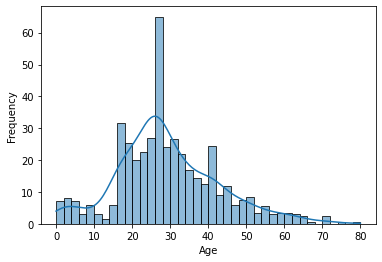

In [28]:
chart = sns.histplot(data = train_df, x = 'Age',
                    kde = True, bins = 40,
                    stat = 'frequency')

# create labels for age groups
labels = ['Child','Youth', 'Adult', 'Middle Aged', 'Elderly']
train_df['Age_group'] = pd.cut(train_df['Age'], bins = 5, labels = labels)
train_df['Age_group'].value_counts()

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr,Adult


### Filling missing values on embarked column

In [30]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_group
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,NaN,Miss,Adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,NaN,Mrs,Middle Aged


We can realize that both passangers are females, were both in first class (pclass 1), had paid a fare of 80 and they both survived. <br> This makes filling the nan values easier

In [31]:
# Lets display values with the above characteristics

display(train_df[(train_df['Sex'] == 'female') & (train_df['Pclass'] == 1)].groupby(['Sex','Pclass','Embarked'])['Fare'].median())

Sex     Pclass  Embarked
female  1       C           83.1583
                Q           90.0000
                S           79.6500
Name: Fare, dtype: float64

We can see that most people who paid approximately 80 pounds, embarked at Southamtom (S).<br>
Therefore, we assign the empty values to <strong>Southampton (S)</strong>

In [32]:
train_df['Embarked'].fillna('S', inplace = True)
train_df['Embarked'].isna().sum()

0

### Dropping columns that are not useful anymore

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr,Adult


In [34]:
train_df.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Fare'], axis = 1, inplace = True)
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_group
0,0,3,male,1,0,S,Mr,Youth
1,1,1,female,1,0,C,Mrs,Adult
2,1,3,female,0,0,S,Miss,Youth
3,1,1,female,1,0,S,Mrs,Adult
4,0,3,male,0,0,S,Mr,Adult


### creating dummies

In [35]:
train_data = pd.get_dummies(data = train_df, dummy_na = False)
train_data

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age_group_Child,Age_group_Youth,Age_group_Adult,Age_group_Middle Aged,Age_group_Elderly
0,0,3,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0
1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
2,1,3,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,0,3,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
887,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0
888,0,3,1,2,1,0,0,0,1,1,0,0,0,1,0,0,0,0
889,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0


# Modelling

In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier , GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, StratifiedKFold, learning_curve
from tqdm import tqdm

In [37]:
# Data splitting

y_train = train_data['Survived']
X_train = train_data.drop('Survived', axis=1)
X_test = test_df.drop('PassengerId', axis=1)
y_test = test_df

y_train.shape, X_train.shape, y_test.shape, X_test.shape

((891,), (891, 17), (418, 11), (418, 10))

100%|██████████| 13/13 [00:35<00:00,  2.74s/it]


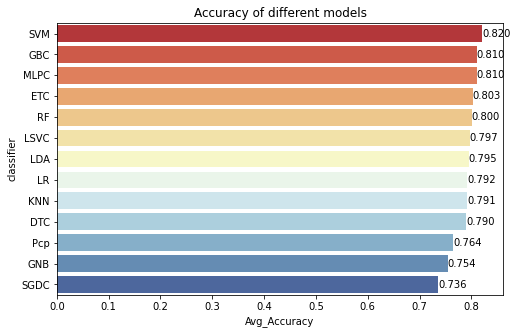

In [38]:
# Cross validating with Kfold stratified crossval


from statistics import mean


Kfold = StratifiedKFold(n_splits=10)

random_state = 2

classifiers = {
    "RF" : RandomForestClassifier(random_state=random_state),
    "GBC": GradientBoostingClassifier(random_state=random_state),
    "ETC": ExtraTreesClassifier(random_state=random_state),
    "LDA": LinearDiscriminantAnalysis(),
    "LR" : LogisticRegression(),
    "Pcp" : Perceptron(random_state=random_state),
    "SGDC" : SGDClassifier(random_state=random_state),
    "KNN": KNeighborsClassifier(),
    "DTC": DecisionTreeClassifier(random_state=random_state),
    "MLPC": MLPClassifier(),
    "SVM": SVC(random_state=random_state),
    "LSVC": LinearSVC(random_state=random_state),
    "GNB" : GaussianNB()
}

classifier_results = pd.DataFrame(columns=["classifier", "Avg_Accuracy"])
for name, clf in tqdm(classifiers.items()):
    model = clf
    cv_results = cross_validate(model,X_train, y_train, cv = Kfold,scoring=(['accuracy', 'f1']))
    classifier_results = classifier_results.append({
        "classifier":name,
        "Avg_Accuracy" : cv_results['test_accuracy'].mean()
    
    }, ignore_index = True)

classifier_results = classifier_results.sort_values("Avg_Accuracy", ascending=False)

classifier_results

fig = plt.figure(figsize=(8,5))
chart = sns.barplot(x="Avg_Accuracy", y="classifier", data = classifier_results, palette='RdYlBu')
chart.bar_label(chart.containers[0], fmt='%.3f')
plt.title("Accuracy of different models")
plt.show()


We can see that SVM has the best accuracy with 82%

## Model hyperparameter tuning

### SVM

In [42]:
SVM = SVC(probability=True)
SVM_Params = {
    'kernel':['poly'],
    'C':[0.01,0.1,1],
    'gamma':[0.01,0.1,1],
    'random_state':[0,2,42]
}
SVM_grid = GridSearchCV(
    SVM, SVM_Params, refit=True,
    scoring="accuracy", verbose=1, cv=Kfold
)

SVM_grid.fit(X_train, y_train)

SVM_best = SVM_grid.best_estimator_
print(SVM_grid.best_score_, SVM_best)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
0.8181897627965042 SVC(C=1, gamma=0.1, kernel='poly', probability=True, random_state=0)


### GBC

In [43]:
GBC = GradientBoostingClassifier()
GBC_params = {'n_estimators':[5,10,50],
                'learning_rate':[0.01,0.1,1],
                'random_state': [0,1,2,3]}

GBC_grid = GridSearchCV(GBC, GBC_params, 
                        refit=True, scoring="accuracy", verbose=1, cv=Kfold)
GBC_grid.fit(X_train,y_train)

GBC_best = GBC_grid.best_estimator_

print(GBC_grid.best_score_, GBC_grid.best_estimator_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
0.8170911360799001 GradientBoostingClassifier(n_estimators=50, random_state=0)


### Linear regression

In [44]:
LR = LogisticRegression()
LR_params = {'solver':['newton-cg','lbfgs','liblinear'],
            'C':[0.001,0.01,0.1,1,10]}

LR_grid = GridSearchCV(LR, LR_params, 
                    refit=True, scoring="accuracy", verbose=1, cv=Kfold)
LR_grid.fit(X_train,y_train)

LR_best = LR_grid.best_estimator_

print(LR_grid.best_score_, LR_grid.best_estimator_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
0.7990886392009987 LogisticRegression(C=0.1, solver='newton-cg')


### LDA

In [46]:
LDA = LinearDiscriminantAnalysis()
LDA_params = {'solver': ['svd', 'lsqr', 'eigen']}

LDA_grid = GridSearchCV(LDA, LDA_params, 
                        refit=True, scoring="accuracy", verbose=1, cv=Kfold)
LDA_grid.fit(X_train,y_train)

LDA_best = LDA_grid.best_estimator_

print(LDA_grid.best_score_,LDA_grid.best_estimator_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
0.7946317103620475 LinearDiscriminantAnalysis()


  #                                           The End